<a href="https://colab.research.google.com/github/JulieWang417/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-10-30 23:35:45--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.26.238
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.26.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’

instacart_online_gr 100%[===================>] 196.03M  43.7MB/s    in 4.9s    

2019-10-30 23:35:50 (40.0 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

**import data, find what we need, merge into a single dataframe**

In [0]:
import pandas as pd

**Aisles**

In [6]:
aisles = pd.read_csv('aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


**Departments**

In [7]:
departments = pd.read_csv("departments.csv")
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


**order_products__prior**

In [8]:
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


for this table, we need "product_id"

**order_products__train**

In [9]:
order_products__train = pd.read_csv('order_products__train.csv')
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


for this table, we need "product_id"

**orders**

In [10]:
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


for this table, we need "order_id"

**products**

In [11]:
products = pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


we need 
1.   product_name
2.   product_id

In [12]:
# combine order_products__train and order_product__prior into new table order_products
conlumn = ["order_id","product_id","add_to_cart_order"]
order_products = pd.concat([order_products__train[conlumn],order_products__prior[conlumn]])
order_products.head()

,order_id,product_id,add_to_cart_order
0,1,49302,1
1,1,11109,2
2,1,10246,3
3,1,49683,4
4,1,43633,5


In [0]:
# create table merged, with three table products,order_products and orders.

merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id',"order_hour_of_day"]]))



In [14]:
merged.shape

(33819106, 4)

In [15]:
banana = merged[merged['product_name'] == "Banana"]
banana.shape

(491291, 4)

In [0]:
banana = merged[merged['product_name'] == "Banana"]

In [41]:
TOP_10 = merged["product_name"].value_counts()[:10]
TOP_10 = TOP_10.reset_index()
TOP_10 = TOP_10.rename(columns={"index":"product name","product_name":"order_counts"})
TOP_10

,product name,order_counts
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877
5,Organic Avocado,184224
6,Large Lemon,160792
7,Strawberries,149445
8,Limes,146660
9,Organic Whole Milk,142813


### ***Above, we got the list of the top 10 most frequently ordered products, and many times each product ordered.***

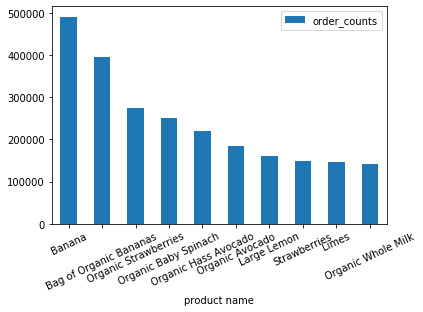

In [45]:
TOP_10.plot(x='product name', y='order_counts', kind='bar', rot=25);

# Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

In [19]:
table1.head()

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [20]:
table2.head()

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


### convert table1 to tidy

In [21]:
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [22]:
tidy1 = table1.melt(id_vars='index',value_vars=['treatmenta','treatmentb'],var_name='trt',value_name='result')
tidy1 = tidy1.rename(columns={"index":"name"})
tidy1['trt'] = tidy1['trt'].str.replace("treatment","")
tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


### convert table2 to Tidy

In [23]:
table2 = table2.reset_index()
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [24]:
table2 = table2.rename(columns={"John Smith":"John_Smith","Jane Doe":"Jane_Doe","Mary Johnson":"Mary_Johnson"})
table2

,index,John_Smith,Jane_Doe,Mary_Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [25]:

tidy2 = table2.melt(id_vars="index",value_vars=["John_Smith","Jane_Doe","Mary_Johnson"])
tidy2

,index,variable,value
0,treatmenta,John_Smith,NaN
1,treatmentb,John_Smith,2.0
2,treatmenta,Jane_Doe,16.0
3,treatmentb,Jane_Doe,11.0
4,treatmenta,Mary_Johnson,3.0
5,treatmentb,Mary_Johnson,1.0


In [26]:
tidy2 = tidy2.rename(columns={
    'index': 'trt', 
    'variable': 'name', 
    'value': 'result'
})
tidy2["trt"] = tidy2["trt"].str.replace("treatment","")
tidy2["name"] = tidy2["name"].str.replace("_"," ")
tidy2 = tidy2.reindex(columns=['name',"trt","result"])
tidy2

,name,trt,result
0,John Smith,a,NaN
1,John Smith,b,2.0
2,Jane Doe,a,16.0
3,Jane Doe,b,11.0
4,Mary Johnson,a,3.0
5,Mary Johnson,b,1.0


### convert tidy1 to table1(rename wide1)

In [27]:
#The pivot_table function is the inverse of melt.
# index: unique identifier
# columns: What do you want to differentiate the columns in wide format
# values: Where are the numbers at - go in the middle of the wide dataframe

wide1 = tidy1.pivot_table(index='name', columns='trt', values='result')
wide1 = wide1.reset_index()
wide1 = wide1.rename(columns={"a":"treatmenta","b":"treatmentb"})
wide1


trt,name,treatmenta,treatmentb
0,Jane Doe,16.0,11.0
1,John Smith,NaN,2.0
2,Mary Johnson,3.0,1.0


### convert tidy2 to table2(rename wide2)

In [28]:
table2

,index,John_Smith,Jane_Doe,Mary_Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [29]:
wide2 = tidy2.pivot_table(index='trt', columns='name', values='result')
wide2 = wide2.rename(columns={"trt":"index"}) 
wide2 = wide2.reset_index()
wide2

name,trt,Jane Doe,John Smith,Mary Johnson
0,a,16.0,NaN,3.0
1,b,11.0,2.0,1.0


### Create a pivot table showing the number of passengers by month and year. 

In [0]:
flights = sns.load_dataset('flights')

In [31]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [32]:
flights_new = flights.pivot_table(index="year",columns="month")
flights_new

passengers                       ...                                    
month    January February March April  ... September October November December
year                                   ...                                    
1949         112      118   132   129  ...       136     119      104      118
1950         115      126   141   135  ...       158     133      114      140
1951         145      150   178   163  ...       184     162      146      166
1952         171      180   193   181  ...       209     191      172      194
1953         196      196   236   235  ...       237     211      180      201
1954         204      188   235   227  ...       259     229      203      229
1955         242      233   267   269  ...       312     274      237      278
1956         284      277   317   313  ...       355     306      271      306
1957         315      301   356   348  ...       404     347      305      336
1958         340      318   362   348  ...       404     359      310      337
1959         360      342   406   396  ...       463     407      362      405
1960         417      391   419   461  ...       508     461      390      432

[12 rows x 12 columns]

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [33]:
merged.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,6695,1
1,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,6695,1
2,3298,Mozzarella String Cheese,6695,1
3,6184,Clementines,6695,1
4,9007,Frosted Flakes,6695,1


In [50]:
merged1 = merged["product_id"].value_counts()
merged1 = merged1.reset_index()
merged1.columns = ['product_id', 'order_counts'] # reset column name
merged1.head()

,product_id,order_counts
0,24852,491291
1,13176,394930
2,21137,275577
3,21903,251705
4,47209,220877


In [51]:
# "We'll define "popular products" as products with more than 2,900 orders."
OP_2900 = merged1[merged1['order_counts']>=2900]
OP_2900.shape

(2053, 2)

In [52]:
# # Get popular product IDs to reduce the data volume
# The original plot uses top 20000 ordered proudcts as "popular products"

OP_2900 = OP_2900.sort_values(by='order_counts', ascending=False).head(20000)
OP_2900.head(10)

,product_id,order_counts
0,24852,491291
1,13176,394930
2,21137,275577
3,21903,251705
4,47209,220877
5,47766,184224
6,47626,160792
7,16797,149445
8,26209,146660
9,27845,142813


In [53]:
# merge to get 'order_hour_of_day'
condition = (order_products['product_id']
             .isin(OP_2900['product_id'])
            )
pop_prod = (order_products[condition][['product_id', 'order_id']]
            .merge(orders[['order_id', 'order_hour_of_day']],
                   how='inner', on='order_id')
           )


,product_id,order_id,order_hour_of_day
0,130,6695,1
1,3298,6695,1
2,6184,6695,1
3,11266,6695,1
4,26317,6695,1


In [54]:
pop_prod.shape

(22456686, 3)

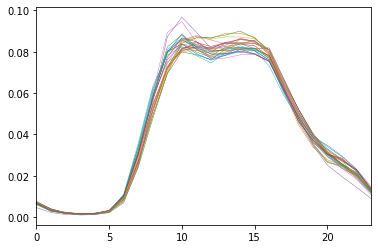

In [56]:
# check "banana" etc. the top 25 most freqently bought products
for p in OP_2900['product_id'][0:25]:
  (pop_prod[pop_prod['product_id']==p]['order_hour_of_day']
   .value_counts(normalize=True)
   .sort_index() # Sort object by labels (along an axis)
   .plot(linewidth=0.5)
  );

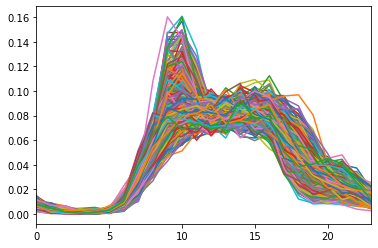

In [59]:
# all the "popular" products
for p in OP_2900['product_id']:
  (pop_prod[pop_prod['product_id']==p]['order_hour_of_day']
   .value_counts(normalize=True)
   .sort_index() # Sort object by labels (along an axis)
   .plot()
  );

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)